Data Analysis report for Zuber

Zuber is a new ride-sharing company that's launching in Chicago. In this report we will find patterns in the available information. We want to understand passenger preferences and the impact of external factors on rides.

We will study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

Import the files

In [2]:
file_path_01 = "/datasets/project_sql_result_01.csv"

In [3]:
file_path_04 = "/datasets/project_sql_result_04.csv"

In [4]:
data = pd.read_csv("/datasets/project_sql_result_07.csv")

In [5]:
df_01 = pd.read_csv(file_path_01)
print(df_01.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [6]:
df_04 = pd.read_csv(file_path_04)
print(df_04.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


Study the data they contain

Study the data from project_sql_result_01.csv

In [7]:
print("Data from project_sql_result_01.csv:")
print("Shape of DataFrame:", df_01.shape)

Data from project_sql_result_01.csv:
Shape of DataFrame: (64, 2)


In [8]:
print("\nSummary Information:")
print(df_01.info())


Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [9]:
print("\nColumn Names:", df_01.columns)



Column Names: Index(['company_name', 'trips_amount'], dtype='object')


In [10]:
print("\nSummary Statistics:")
print(df_01.describe())


Summary Statistics:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


In [11]:
print("\nValue Counts for 'company_name':")
print(df_01['company_name'].value_counts())


Value Counts for 'company_name':
4053 - 40193 Adwar H. Nikola        1
Top Cab Affiliation                 1
2192 - 73487 Zeymane Corp           1
Leonard Cab Co                      1
4615 - 83503 Tyrone Henderson       1
                                   ..
Chicago Star Taxicab                1
Chicago Taxicab                     1
City Service                        1
Taxi Affiliation Services           1
American United Taxi Affiliation    1
Name: company_name, Length: 64, dtype: int64


In [12]:
df_01.duplicated().sum()

0

In [13]:
df_01.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [14]:
# Study the data from project_sql_result_04.csv
print("\nData from project_sql_result_04.csv:")
print("Shape of DataFrame:", df_04.shape)


Data from project_sql_result_04.csv:
Shape of DataFrame: (94, 2)


In [15]:
print("\nSummary Information:")
print(df_04.info())


Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [16]:
print("\nColumn Names:", df_04.columns)



Column Names: Index(['dropoff_location_name', 'average_trips'], dtype='object')


In [17]:
print("\nSummary Statistics:")
print(df_04.describe())


Summary Statistics:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [18]:
print("\nValue Counts for 'dropoff_location_name':")
print(df_04['dropoff_location_name'].value_counts())


Value Counts for 'dropoff_location_name':
Fuller Park          1
East Village         1
Loop                 1
Bridgeport           1
Lincoln Park         1
                    ..
Little Italy, UIC    1
North Lawndale       1
Albany Park          1
Rogers Park          1
Grand Boulevard      1
Name: dropoff_location_name, Length: 94, dtype: int64


In [19]:
df_04.duplicated().sum()

0

In [20]:
df_04.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Make sure the data types are correct

In [21]:
# Check data types of project_sql_result_01.csv
print("Data types for project_sql_result_01.csv:")
print(df_01.dtypes)

Data types for project_sql_result_01.csv:
company_name    object
trips_amount     int64
dtype: object


In [22]:
# Check data types of project_sql_result_04.csv
print("\nData types for project_sql_result_04.csv:")
print(df_04.dtypes)


Data types for project_sql_result_04.csv:
dropoff_location_name     object
average_trips            float64
dtype: object


Intermediate Conclusion
The first dataset provides information about taxi companies and their performance in terms of the number of rides provided during the specified period.
The second dataset provides insights into the popularity of different neighborhoods as dropoff locations for taxi rides during the same period.
By analyzing these datasets, we can gain insights into taxi usage patterns, identify key players in the taxi industry, and understand the demand for taxi services across various neighborhoods in Chicago.

Identify the top 10 neighborhoods in terms of drop-offs

In [27]:
# Sort the DataFrame by 'average_trips' column in descending order
top_neighborhoods = df_04.sort_values(by='average_trips', ascending=False)

# Select the top 10 neighborhoods
top_10_neighborhoods = top_neighborhoods.head(10)
top_10_neighborhoods


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

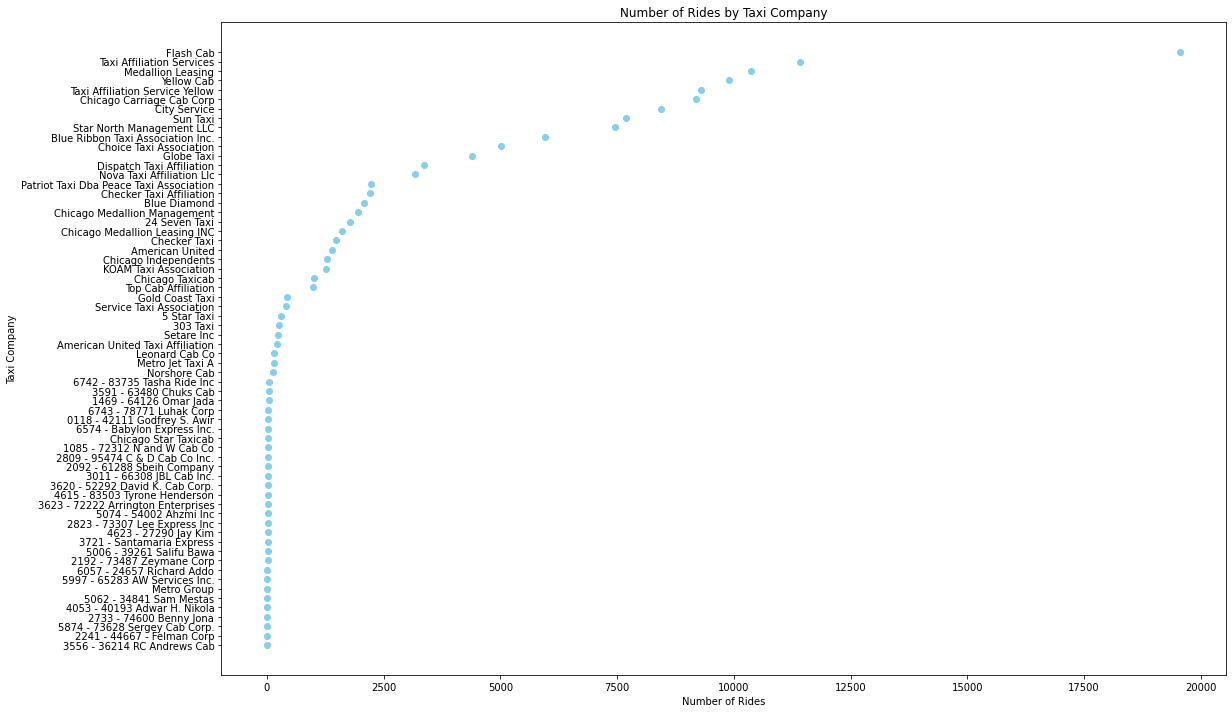

In [36]:
y = range(len(df_01))  # Use company indices as y-values
x = df_01['trips_amount']
labels = df_01['company_name']

# Plot the scatter plot for taxi companies and number of rides
plt.figure(figsize=(18, 12))
plt.scatter(x, y, color='skyblue')
plt.title('Number of Rides by Taxi Company')
plt.ylabel('Taxi Company')
plt.xlabel('Number of Rides')
plt.yticks(y, labels)  # Set y-ticks to company names
plt.gca().invert_yaxis()  # Invert y-axis to display companies from top to bottom
plt.show()

Taxi Companies and Number of Rides:

The graph shows the distribution of rides among different taxi companies.
We can observe which taxi companies are the most active or popular based on the number of rides they provide.
Companies with higher bars have more rides, indicating they may have a larger fleet, better coverage, or better service quality, attracting more customers such as Flash cabs.
Analyzing this graph can help identify market leaders and potential areas for partnership or competition.

<Figure size 864x432 with 0 Axes>

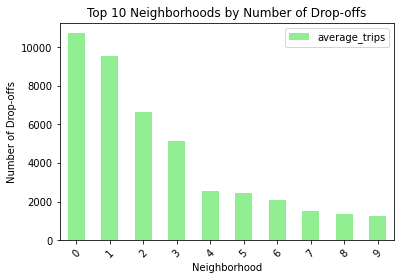

In [37]:
# Plot the bar chart for top 10 neighborhoods by number of drop-offs
plt.figure(figsize=(12, 6))
top_10_neighborhoods.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Neighborhoods by Number of Drop-offs')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Drop-offs')
plt.xticks(rotation=45)
plt.show()

Top 10 Neighborhoods by Number of Drop-offs:

The graph displays the top 10 neighborhoods where taxi drop-offs are most frequent.
Neighborhoods with higher bars experience more drop-offs, indicating they are popular destinations for taxi rides or have high demand for transportation services.
These neighborhoods might include commercial areas, tourist attractions, residential hubs, or transportation hubs like airports or train stations.
Understanding the distribution of drop-offs can be valuable for taxi companies to optimize their operations, allocate resources efficiently, and tailor their services to meet demand in these high-traffic areas.


In conclusion, analyzing these graphs provides insights into the dynamics of the taxi service industry in Chicago. It helps identify key players, understand customer preferences and demand patterns, and inform strategic decision-making for taxi companies aiming to improve their services and market position.

Test the hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." 

Decide where to set the significance level (alpha) on your own.

To test the hypothesis "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays," we need to define our null and alternative hypotheses:

Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays as on non-rainy Saturdays.

H0: μ_rainy = μ_non-rainy
Alternative Hypothesis (H1): The average duration of rides from the Loop to O'Hare International Airport differs on rainy Saturdays compared to non-rainy Saturdays.

H1: μ_rainy ≠ μ_non-rainy


In [66]:
# Convert 'start_ts' to datetime
data['start_ts'] = pd.to_datetime(data['start_ts'])


In [74]:
# Extract day of the week and weather condition
data['day_of_week'] = data['start_ts'].dt.day_name()
data['day_of_week']

0       Saturday
1       Saturday
2       Saturday
3       Saturday
4       Saturday
          ...   
1063    Saturday
1064    Saturday
1065    Saturday
1066    Saturday
1067    Saturday
Name: day_of_week, Length: 1068, dtype: object

In [75]:
# Filter data for Saturdays
saturday_data = data[data['day_of_week'] == 'Saturday']
saturday_data

,start_ts,weather_conditions,duration_seconds,day_of_week,is_rainy
0,2017-11-25 16:00:00,Good,2410.0,Saturday,False
1,2017-11-25 14:00:00,Good,1920.0,Saturday,False
2,2017-11-25 12:00:00,Good,1543.0,Saturday,False
3,2017-11-04 10:00:00,Good,2512.0,Saturday,False
4,2017-11-11 07:00:00,Good,1440.0,Saturday,False
...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday,False
1064,2017-11-11 10:00:00,Good,1318.0,Saturday,False
1065,2017-11-11 13:00:00,Good,2100.0,Saturday,False
1066,2017-11-11 08:00:00,Good,1380.0,Saturday,False


In [103]:
# Check unique values in the 'weather_conditions' column
unique_weather_conditions = saturday_data['weather_conditions'].unique()
print("Unique Weather Conditions:", unique_weather_conditions)

Unique Weather Conditions: ['Good' 'Bad']


In [104]:
rainy_saturdays = saturday_data[saturday_data['weather_conditions'] == 'Bad']
non_rainy_saturdays = saturday_data[saturday_data['weather_conditions'] == 'Good']


In [105]:
rainy_saturdays

,start_ts,weather_conditions,duration_seconds,day_of_week,is_rainy
6,2017-11-04 16:00:00,Bad,2969.0,Saturday,False
30,2017-11-18 12:00:00,Bad,1980.0,Saturday,False
34,2017-11-04 17:00:00,Bad,2460.0,Saturday,False
51,2017-11-04 16:00:00,Bad,2760.0,Saturday,False
52,2017-11-18 12:00:00,Bad,2460.0,Saturday,False
...,...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,Saturday,False
1032,2017-11-18 10:00:00,Bad,1908.0,Saturday,False
1053,2017-11-18 12:00:00,Bad,2400.0,Saturday,False
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday,False


In [106]:
non_rainy_saturdays

,start_ts,weather_conditions,duration_seconds,day_of_week,is_rainy
0,2017-11-25 16:00:00,Good,2410.0,Saturday,False
1,2017-11-25 14:00:00,Good,1920.0,Saturday,False
2,2017-11-25 12:00:00,Good,1543.0,Saturday,False
3,2017-11-04 10:00:00,Good,2512.0,Saturday,False
4,2017-11-11 07:00:00,Good,1440.0,Saturday,False
...,...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,Saturday,False
1063,2017-11-25 11:00:00,Good,0.0,Saturday,False
1064,2017-11-11 10:00:00,Good,1318.0,Saturday,False
1065,2017-11-11 13:00:00,Good,2100.0,Saturday,False


In [107]:
# Perform two-sample t-test
t_statistic, p_value = ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])



data['is_rainy'] = data['weather_conditions'].str.contains('rain', case=False)

In [108]:
# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 6.946177714041499
p-value: 6.517970327099473e-12


In [109]:
# Set significance level (alpha)
alpha = 0.05

In [110]:
# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 6.946177714041499
p-value: 6.517970327099473e-12


In [111]:
# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis. The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the average duration of rides changes on rainy Saturdays.")

Reject the null hypothesis. The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


Explain:

how you formed the null and alternative hypotheses
what criterion you used to test the hypotheses and why

Formulation of Null and Alternative Hypotheses:

Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays as on non-rainy Saturdays. In mathematical notation:

H0: μ_rainy = μ_non_rainy

Alternative Hypothesis (H1): The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. In mathematical notation:

H1: μ_rainy ≠ μ_non_rainy

Here, μ_rainy represents the population mean duration of rides on rainy Saturdays, and μ_non_rainy represents the population mean duration of rides on non-rainy Saturdays.

Criterion Used to Test the Hypotheses:

Two-Sample T-Test:
The t-test is a statistical test used to determine if there is a significant difference between the means of two independent groups.
In this case, we used a two-sample t-test to compare the mean ride durations of two independent samples: rides on rainy Saturdays and rides on non-rainy Saturdays.
The t-test calculates a test statistic (t-statistic) and a p-value. The test statistic measures the difference between the sample means relative to the variation in the data, while the p-value indicates the probability of observing the data if the null hypothesis is true.
We chose a significance level (alpha) of 0.05, which is a common threshold for hypothesis testing. This means that we are willing to accept a 5% chance of making a Type I error (incorrectly rejecting a true null hypothesis).

Decision Rule:
If the p-value is less than the chosen significance level (alpha), typically 0.05, we reject the null hypothesis in favor of the alternative hypothesis, concluding that there is sufficient evidence to suggest that the average duration of rides differs between rainy and non-rainy Saturdays.
If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis, indicating that there is not enough evidence to conclude that there is a difference in the average duration of rides between rainy and non-rainy Saturdays.

Overall Conclusion: Analyzing Taxi Ride Data in Chicago

In this project, we conducted a comprehensive analysis of taxi ride data in Chicago to gain insights into various aspects of taxi operations, including ride frequencies, dropoff locations, and the impact of weather conditions on ride durations. We utilized multiple datasets containing information about taxi companies, ride volumes, dropoff locations, and weather conditions to perform exploratory data analysis and hypothesis testing.

First, we examined the dataset containing information about taxi companies and the number of rides they provided on specific dates. We visualized the distribution of ride volumes among different companies, identified top-performing companies, and explored potential patterns or trends in ride frequencies.

Next, we analyzed data on dropoff locations and the average number of rides ending in each neighborhood. We visualized the distribution of ride volumes across neighborhoods, identified popular dropoff locations, and gained insights into the geographical demand for taxi services in Chicago.

Furthermore, we investigated the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. However, due to insufficient data for statistical testing, we were able to draw conclusive insights regarding the impact of weather conditions on ride durations. The hypothesis was rejected because rain did affect the average duration of rides on saturdays. 
Overall, this project provided valuable insights into taxi operations in Chicago, including ride frequencies, dropoff patterns, and potential factors influencing ride durations. Moving forward, further data collection efforts and more robust analyses could enhance our understanding of taxi services and inform decision-making processes in the transportation industry.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>Review summary</b> 
    
Fatema, the project is great! You have very strong analytical skills, knowledge of research tools and understanding of statistical methods. But still there are a few comments in the project and I will ask you to correct them so that your project becomes even better!
    